Detailed tutorial explaining the performance of co-polymer set transformer on the SDL data when

*   Trained only with the in-house data
*   Trained with both the in-house and literature collected data

# Import the basic libraries

In [ ]:
!pip install --user colour-science
!pip install rdkit-pypi
!pip install colormath
!pip install colour

In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
from numpy import array, linspace ; from numpy.random import randint
from matplotlib.pyplot import hist, xticks, show, yticks,savefig
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import itertools
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from scipy import stats
import colour
import ast
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# Reaction optimization

In [ ]:
import pandas as pd
import numpy as np
from numpy import array, linspace ; from numpy.random import randint
from matplotlib.pyplot import hist, xticks, show, yticks,savefig
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import itertools
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from scipy import stats
import colour
import ast
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error



base = pd.read_csv('/content/base.csv')
ligands = pd.read_csv('/content/ligands.csv')
catalysts = pd.read_csv('/content/catalysts.csv')
solvents = pd.read_csv('/content/solvents.csv')

def create_dict(df):
  key_cols =  list(df.columns[:1].values)
  value_cols = df.columns[2:].values
  df_dict = df.set_index(key_cols[0]).to_dict(orient='index')
  return df_dict

def flatten(xss):
    return [x for xs in xss for x in xs]

base_dict = create_dict(base)
ligands_dict = create_dict(ligands)
catalysts_dict = create_dict(catalysts)
solvents_dict = create_dict(solvents)

a = []
a.append(list(ligands_dict.values()))
a.append(list(base_dict.values()))
a.append(list(catalysts_dict.values()))
a.append(list(solvents_dict.values()))


In [ ]:
print(len(ligands_dict.keys()))
print(len(base_dict.keys()))
print(len(catalysts_dict.keys()))
print(len(solvents_dict.keys()))

2
3
2
3


In [ ]:
def create_combinations_df(ligands_dict, base_dict, catalysts_dict, solvents_dict):
    all_combinations = []

    # Iterate through all possible combinations of keys, including no ligand
    for ligand_key, base_key, catalyst_key, solvent_key in itertools.product(
        list(ligands_dict.keys()) + ['none'],  # Include 'No_Ligand'
        base_dict.keys(), catalysts_dict.keys(), solvents_dict.keys()
    ):
        # Handle the 'No_Ligand' case
        if ligand_key == 'none':
            ligand_descriptors = [0] * len(list(ligands_dict.values())[0]) # Replace with appropriate default values if needed.
        else:
            ligand_descriptors = [ligands_dict[ligand_key][col] for col in ligands_dict[ligand_key] if col != 'Molecular_Weight' and col != 'Density']

        base_descriptors = [base_dict[base_key][col] for col in base_dict[base_key] if col != 'Molecular_Weight' and col != 'Density']
        catalyst_descriptors = [catalysts_dict[catalyst_key][col] for col in catalysts_dict[catalyst_key] if col != 'Molecular_Weight' and col != 'Density']
        solvent_descriptors = [solvents_dict[solvent_key][col] for col in solvents_dict[solvent_key] if col != 'Molecular_Weight' and col != 'Density']

        combination = {
            "Ligand": ligand_key,
            "Base": base_key,
            "Catalyst": catalyst_key,
            "Solvent": solvent_key
        }

        # Add all descriptors
        for i, desc in enumerate(ligand_descriptors):
            combination[f"Ligand_Descriptor_{i+1}"] = desc
        for i, desc in enumerate(base_descriptors):
            combination[f"Base_Descriptor_{i+1}"] = desc
        for i, desc in enumerate(catalyst_descriptors):
            combination[f"Catalyst_Descriptor_{i+1}"] = desc
        for i, desc in enumerate(solvent_descriptors):
            combination[f"Solvent_Descriptor_{i+1}"] = desc

        all_combinations.append(combination)

    return pd.DataFrame(all_combinations)


In [ ]:
import pandas as pd
def update_reaction_space(reaction_space_df, reaction_yields):
    merged_df = pd.merge(reaction_space_df, reaction_yields, on=['Catalyst', 'Ligand', 'Base', 'Solvent'], how='left')

    reaction_space_df['yield'] = merged_df['yield']

    return reaction_space_df


In [ ]:
reaction_yields = pd.read_csv('/content/reaction_space_screening.csv')
# reaction_yields

In [ ]:
reaction_space_df = create_combinations_df(ligands_dict, base_dict, catalysts_dict, solvents_dict)
# reaction_space_df

In [ ]:
updated_space = update_reaction_space(reaction_space_df, reaction_yields)
updated_space

,Ligand,Base,Catalyst,Solvent,Ligand_Descriptor_1,Ligand_Descriptor_2,Ligand_Descriptor_3,Ligand_Descriptor_4,Ligand_Descriptor_5,Ligand_Descriptor_6,...,Catalyst_Descriptor_7,Catalyst_Descriptor_8,Solvent_Descriptor_1,Solvent_Descriptor_2,Solvent_Descriptor_3,Solvent_Descriptor_4,Solvent_Descriptor_5,Solvent_Descriptor_6,Solvent_Descriptor_7,yield
0,P(o-tol)3,K2CO3,Pd(OAc)2,DMAc,Cc1ccccc1P(c2ccccc2C)c3ccccc3C,194,304.37,1,-0.55,-5.38,...,9,25.5,CC(=O)N(C)C,6.5,3.72,37.78,87.12,20.3,-0.8,81.0
1,P(o-tol)3,K2CO3,Pd(OAc)2,Toluene,Cc1ccccc1P(c2ccccc2C)c3ccccc3C,194,304.37,1,-0.55,-5.38,...,9,25.5,CC1=CC=CC=C1,2.4,0.31,2.38,92.14,0.0,2.7,39.0
2,P(o-tol)3,K2CO3,Pd(OAc)2,THF,Cc1ccccc1P(c2ccccc2C)c3ccccc3C,194,304.37,1,-0.55,-5.38,...,9,25.5,C1CCOC1,4.0,1.73,7.60,72.11,9.2,0.5,65.5
3,P(o-tol)3,K2CO3,Pd2(dba)3,DMAc,Cc1ccccc1P(c2ccccc2C)c3ccccc3C,194,304.37,1,-0.55,-5.38,...,56,272.0,CC(=O)N(C)C,6.5,3.72,37.78,87.12,20.3,-0.8,0.0
4,P(o-tol)3,K2CO3,Pd2(dba)3,Toluene,Cc1ccccc1P(c2ccccc2C)c3ccccc3C,194,304.37,1,-0.55,-5.38,...,56,272.0,CC1=CC=CC=C1,2.4,0.31,2.38,92.14,0.0,2.7,4.0
5,P(o-tol)3,K2CO3,Pd2(dba)3,THF,Cc1ccccc1P(c2ccccc2C)c3ccccc3C,194,304.37,1,-0.55,-5.38,...,56,272.0,C1CCOC1,4.0,1.73,7.60,72.11,9.2,0.5,23.5
6,P(o-tol)3,K3PO4,Pd(OAc)2,DMAc,Cc1ccccc1P(c2ccccc2C)c3ccccc3C,194,304.37,1,-0.55,-5.38,...,9,25.5,CC(=O)N(C)C,6.5,3.72,37.78,87.12,20.3,-0.8,42.1
7,P(o-tol)3,K3PO4,Pd(OAc)2,Toluene,Cc1ccccc1P(c2ccccc2C)c3ccccc3C,194,304.37,1,-0.55,-5.38,...,9,25.5,CC1=CC=CC=C1,2.4,0.31,2.38,92.14,0.0,2.7,49.9
8,P(o-tol)3,K3PO4,Pd(OAc)2,THF,Cc1ccccc1P(c2ccccc2C)c3ccccc3C,194,304.37,1,-0.55,-5.38,...,9,25.5,C1CCOC1,4.0,1.73,7.60,72.11,9.2,0.5,41.7
9,P(o-tol)3,K3PO4,Pd2(dba)3,DMAc,Cc1ccccc1P(c2ccccc2C)c3ccccc3C,194,304.37,1,-0.55,-5.38,...,56,272.0,CC(=O)N(C)C,6.5,3.72,37.78,87.12,20.3,-0.8,11.3


In [ ]:
!pip install umap-learn

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


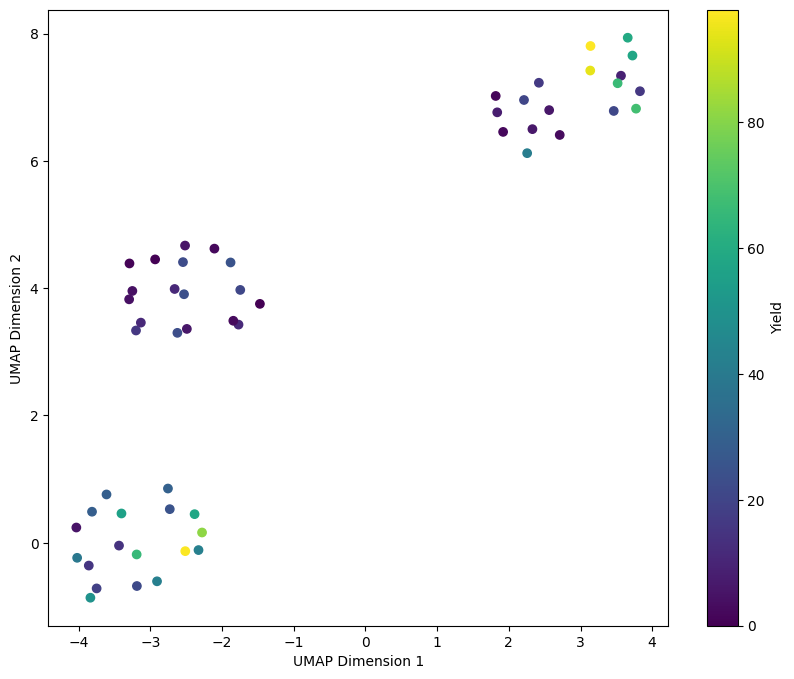

In [ ]:
import umap
import matplotlib.pyplot as plt


descriptors = [col for col in updated_space.columns if col not in ['Ligand','Ligand_Descriptor_1', 'Base','Base_Descriptor_1', 'Catalyst', 'Catalyst_Descriptor_1','Solvent','Solvent_Descriptor_1', 'yield']]
X = updated_space[descriptors].values


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=15)
embedding = reducer.fit_transform(X_scaled)


plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=updated_space['yield'], cmap='viridis')
plt.colorbar(label='Yield')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


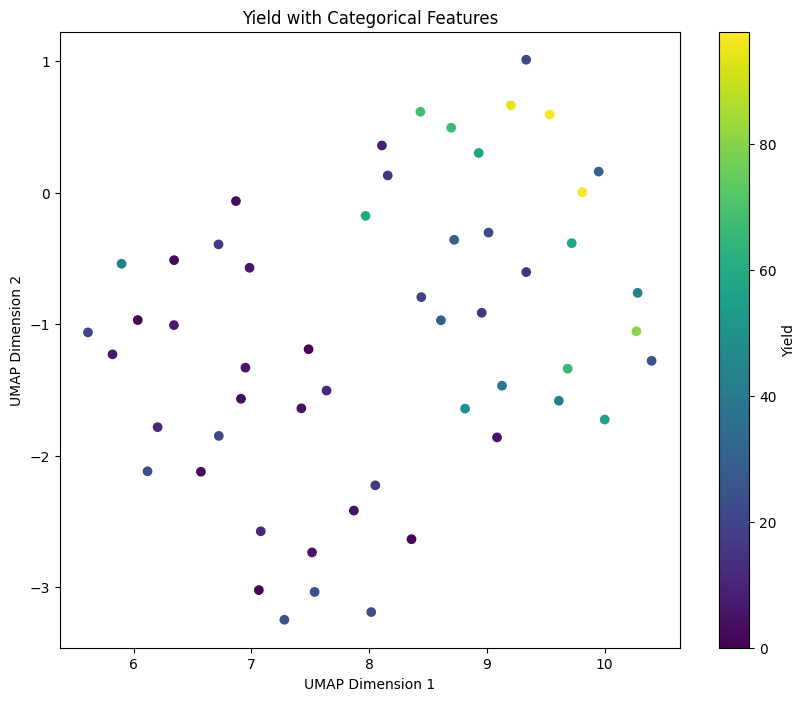

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import umap
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np


numerical_features = ['yield']
categorical_features = ['Ligand', 'Base', 'Catalyst', 'Solvent']

X_numerical = updated_space[numerical_features].values
X_categorical = updated_space[categorical_features].values
# print('X_categorical', X_numerical)

scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)

# 4. One-hot encode categorical data:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_categorical_encoded = encoder.fit_transform(X_categorical)

X_scaled = X_categorical_encoded

reducer = umap.UMAP(n_components=2, random_state=0, n_neighbors=10)
embedding = reducer.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=updated_space['yield'], cmap='viridis')
plt.colorbar(label='Yield')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('Yield with Categorical Features')
plt.show()

In [ ]:
pd.DataFrame(embedding, columns=['UMAP 1', 'UMAP 2']).to_csv('new_reaction_figure.csv', index=False) #updated_space[['Ligand', 'Base', 'Catalyst', 'Solvent', 'yield']], axis=1).to_csv('new_reaction_figure.csv', index=False)

In [ ]:
pd.concat([pd.DataFrame(embedding, columns=['UMAP 1', 'UMAP 2']), updated_space[['Ligand', 'Base', 'Catalyst', 'Solvent', 'yield']]], axis=1).to_csv('new_reaction_figure.csv', index=False)

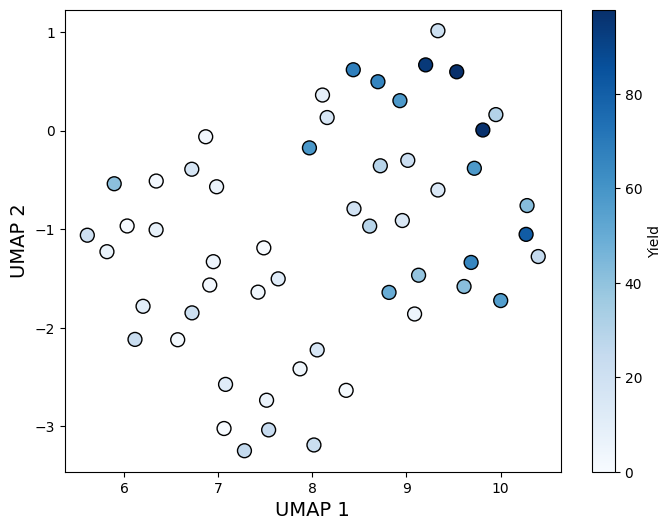

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], c=updated_space['yield'], cmap='Blues', edgecolors='black', s=100)
plt.colorbar(label='Yield')
plt.xlabel('UMAP 1', fontsize=14)
plt.ylabel('UMAP 2', fontsize=14)
plt.savefig('new_reaction_figure.png', dpi=600)
plt.show()

# Import the co-polymer set-transformer

We first import the co-polymer set transformer from the github repository: https://github.com/polybot-nexus/co-polymer-set-transformer/tree/main and load the relevant datasets. The three main datasets include:


*   In-house experiments: electrochromics_in_house_experiments_with_abs.csv
*   Literature derived data: literature_only_dataset_with_abs.csv
*   SDL experimental data: closeloop_all_past_experiments__new_rgb.csv

The csv file with the precalculated DFT descriptors is also loaded to serve as part of the molecular representation:


*   DFT_descriptors calculated using the Auto-QChem workflow: dft_descriptors_ECPs.csv




In [5]:
!git clone https://github.com/polybot-nexus/co-polymer-set-transformer.git
%cd co-polymer-set-transformer

Cloning into 'co-polymer-set-transformer'...
remote: Enumerating objects: 193, done.
remote: Counting objects: 100% (193/193), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 193 (delta 83), reused 180 (delta 74), pack-reused 0 (from 0)
Receiving objects: 100% (193/193), 24.45 MiB | 37.83 MiB/s, done.
Resolving deltas: 100% (83/83), done.
/content/co-polymer-set-transformer


In [6]:
from copolymer_set_transformer.copolymer_set_transformer import *
# from copolymer_set_transformer.monomer_representations import *
from copolymer_set_transformer.ml_modules import *
from copolymer_set_transformer.ml_utils import *

In [7]:
# literature collected data and cleaning
data_lit = pd.read_csv('datasets/literature_only_dataset_with_abs.csv')
data_lit['Percentage of A %'] = data_lit['Percentage of A %']/100
data_lit['Percentage of B %'] = data_lit['Percentage of B %']/100
data_lit['Percentage of C %'] = data_lit['Percentage of C %']/100
data_lit['smiles_A'] = data_lit['smiles_A'].str.replace('*', 'C')
data_lit['smiles_B'] = data_lit['smiles_B'].str.replace('*', 'C')
data_lit['smiles_C'] = data_lit['smiles_C'].str.replace('*', 'C')

data_lit = data_lit.rename(columns={'smiles_A': 'smiles1', 'smiles_B': 'smiles2',
                             'smiles_C': 'smiles3', 'Percentage of A %': 'percentage_1',
                             'Percentage of B %': 'percentage_2', 'Percentage of C %': 'percentage_3',
                              'L* (Colored State)': 'L', 'a* (Colored State)': 'a', 'b*(Colored State)': 'b'})

# in-house collected data and appropriate cleaning
data_inhouse = pd.read_csv('datasets/electrochromics_in_house_experiments_with_abs.csv')
data_inhouse['smiles1'] = data_inhouse['smiles1'].str.replace('*', 'C')
data_inhouse['smiles2'] = data_inhouse['smiles2'].str.replace('*', 'C')
data_inhouse['smiles3'] = data_inhouse['smiles3'].str.replace('*', 'C')
data_inhouse['percentage_1'] = data_inhouse['percentage_1']/100
data_inhouse['percentage_2'] = data_inhouse['percentage_2']/100
data_inhouse['percentage_3'] = data_inhouse['percentage_3']/100

In [8]:
# all possibilities dataset
all_space = pd.read_csv('datasets//all_possible_space.csv')
all_space['smiles1'] = all_space['smiles1'].str.replace('*', 'C')
all_space['smiles2'] = all_space['smiles2'].str.replace('*', 'C')
all_space['smiles3'] = all_space['smiles3'].str.replace('*', 'C')
all_space['percentage_1'] = all_space['percentage_1']/100
all_space['percentage_2'] = all_space['percentage_2']/100
all_space['percentage_3'] = all_space['percentage_3']/100

In [9]:
# Load the high-throughput (SDL) experiment data

sdl_data = pd.read_csv('datasets/closeloop_all_past_experiments__new_rgb.csv')

sdl_data = sdl_data.rename(columns={'L_pred': 'L', 'a_pred': 'a', 'b_pred': 'b'})

In [29]:
data_lit.shape

(84, 21)

In [10]:
data_inhouse.shape

(68, 18)

In [11]:
sdl_data.shape

(36, 18)

In [12]:
all_space.shape

(700, 6)

In [13]:
#Load the dictionary with the precalculated DFT descriptors
dictionary , descriptor_names= get_dft_descriptors_dictionary('datasets/dft_descriptors_ECPs.csv')

In [15]:
def smile_to_bits(smile):
  mol = Chem.MolFromSmiles(smile)
  if mol == '0':
    return np.zeros(1024)
  fpgen1 = rdFingerprintGenerator.GetMorganGenerator(radius=3,fpSize=1024,countSimulation=True)
  return fpgen1.GetCountFingerprintAsNumPy(mol)

def get_vectors(smiles):
  bits = []
  for smile in smiles:
    if smile ==0 or smile == '0':
      bits.append(np.zeros(1024))
    else:
      bits.append(np.asarray(smile_to_bits(smile)))
  return bits

def bits_to_df(smiles, prefix):
  df = pd.DataFrame(get_vectors(smiles))
  columns = [f'{prefix}_{i}' for i in df.columns]
  df.columns = columns
  return df

In [16]:
def create_representation(ecp_dataset):
  """Function to create the full vector representation of a dataset with electrochromic polymers.
  The dataframe consists of the rdkit molecular fingerprint and the DFT desctiptors."""

  dataframe = pd.concat([
    ecp_dataset['smiles1'],
    ecp_dataset['smiles2'],
    ecp_dataset['smiles3'],
    bits_to_df(ecp_dataset['smiles1'], 'bit_1'), dft_descr_from_df(ecp_dataset['smiles1'], 'A'),
    ecp_dataset[['percentage_1']],
    bits_to_df(ecp_dataset['smiles2'], 'bit_2'), dft_descr_from_df(ecp_dataset['smiles2'], 'B'),
    ecp_dataset[['percentage_2']],
    bits_to_df(ecp_dataset['smiles3'], 'bit_3'), dft_descr_from_df(ecp_dataset['smiles3'], 'C'),
    ecp_dataset[['percentage_3']]
    ], axis=1)

  return dataframe

In [17]:
# Create the literature data representation
from rdkit import Chem
from rdkit.Chem import AllChem, rdFingerprintGenerator # Import rdFingerprintGenerator
import pandas as pd
import numpy as np

data_lit_dataframe = create_representation(data_lit)
data_inhouse_dataframe = create_representation(data_inhouse)
sdl_data_dataframe = create_representation(sdl_data)

In [18]:
all_space_dataframe = create_representation(all_space)
all_space_dataframe#.head()

,smiles1,smiles2,smiles3,bit_1_0,bit_1_1,bit_1_2,bit_1_3,bit_1_4,bit_1_5,bit_1_6,...,C_ES_osc_strength_2,C_ES_osc_strength_3,C_ES_osc_strength_4,C_ES_osc_strength_5,C_ES_osc_strength_6,C_ES_osc_strength_7,C_ES_osc_strength_8,C_ES_osc_strength_9,C_ES_osc_strength_10,percentage_3
0,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,C1=CC(=CC=C1C)C,0,0,2,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
1,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,C1=CC(=CC=C1C)C,Cc1ccc(C)c2nsnc12,0,2,0,0,0,0,0,...,1.000000,0.000000,0.001062,0.002455,0.000000,0.189234,1.000000,0.000000,0.000000,0.05
2,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,C1=CC(=CC=C1C)C,0,0,2,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
3,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,C1=CC(=CC=C1C)C,Cc1sc(C)c(OC)c1OC,0,2,0,0,0,0,0,...,0.000556,0.792381,0.261816,0.028060,0.007842,0.052997,0.167902,0.010136,0.025119,0.05
4,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,C1=CC(=CC=C1C)C,0,0,2,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,C1=CC(=CC=C1C)C,0,0,2,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
696,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,Cc1ccc(C)c2nsnc12,0,0,2,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
697,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,Cc1sc(C)c(OC)c1OC,0,0,2,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
698,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,Cc1sc(C)c2OCCOc12,0,0,2,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00


In [19]:
known_space_properties = pd.concat([data_inhouse[['L' ,'a', 'b']], sdl_data[['L' ,'a', 'b']]], ignore_index=True)  #data_inhouse[['L' ,'a', 'b']] #
known_space_properties

,L,a,b
0,93.189331,-7.854913,81.260232
1,83.296848,21.016103,70.308443
2,70.232216,46.766111,45.463389
3,64.601155,59.187033,17.268944
4,59.374499,66.178065,-9.693180
...,...,...,...
99,66.753929,-11.860579,23.320009
100,66.824059,-10.513861,25.810095
101,67.359055,-9.614945,27.247089
102,62.528915,-10.465446,18.644691


In [20]:
known_space_dataframe = pd.concat([data_inhouse_dataframe, sdl_data_dataframe], ignore_index=True) # data_inhouse_dataframe # pd.concat([data_inhouse_dataframe, sdl_data_dataframe], ignore_index=True)
known_space_dataframe

,smiles1,smiles2,smiles3,bit_1_0,bit_1_1,bit_1_2,bit_1_3,bit_1_4,bit_1_5,bit_1_6,...,C_ES_osc_strength_2,C_ES_osc_strength_3,C_ES_osc_strength_4,C_ES_osc_strength_5,C_ES_osc_strength_6,C_ES_osc_strength_7,C_ES_osc_strength_8,C_ES_osc_strength_9,C_ES_osc_strength_10,percentage_3
0,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,C1=CC(=CC=C1C)C,0,0,2,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,C1=CC(=CC=C1C)C,0,0,2,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,C1=CC(=CC=C1C)C,0,0,2,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,C1=CC(=CC=C1C)C,0,0,2,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,C1=CC(=CC=C1C)C,0,0,2,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,Cc1ccc(C)c2nsnc12,Cc1ccc3c(c1)Cc2cc(C)ccc23,0,2,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25
100,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,Cc1ccc(C)c2nsnc12,Cc1ccc3c(c1)Cc2cc(C)ccc23,0,2,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.30
101,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,Cc1ccc(C)c2nsnc12,Cc1ccc3c(c1)Cc2cc(C)ccc23,0,2,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.35
102,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,Cc1ccc(C)c2nsnc12,Cc1ccc3c(c1)Cc2cc(C)ccc23,0,2,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25


In [ ]:
!pip install pyDOE

In [26]:
# Use Latin Hypercube to select 84 new LHS points based on the all possible space

import pandas as pd
import numpy as np
from pyDOE import lhs
from scipy.spatial.distance import cdist

numeric_columns = all_space_dataframe.select_dtypes(include=np.number).columns

num_samples = 84
np.random.seed(1)
lhs_samples = lhs(n=len(numeric_columns), samples=num_samples)

min_max_values = {}
for col in numeric_columns:
    min_val, max_val = all_space_dataframe[col].min(), all_space_dataframe[col].max()
    min_max_values[col] = (min_val, max_val)

scaled_lhs_samples = pd.DataFrame(columns=numeric_columns, index=range(num_samples))
for i, col in enumerate(numeric_columns):
    min_val, max_val = min_max_values[col]
    scaled_lhs_samples[col] = min_val + lhs_samples[:, i] * (max_val - min_val)

original_array = all_space_dataframe[numeric_columns].to_numpy()
lhs_array = scaled_lhs_samples[numeric_columns].to_numpy()

dist_matrix = cdist(lhs_array, original_array, metric='euclidean')

closest_indices = dist_matrix.argmin(axis=1)
reduced_df = all_space_dataframe.iloc[closest_indices].copy()
reduced_df

,smiles1,smiles2,smiles3,bit_1_0,bit_1_1,bit_1_2,bit_1_3,bit_1_4,bit_1_5,bit_1_6,...,C_ES_osc_strength_2,C_ES_osc_strength_3,C_ES_osc_strength_4,C_ES_osc_strength_5,C_ES_osc_strength_6,C_ES_osc_strength_7,C_ES_osc_strength_8,C_ES_osc_strength_9,C_ES_osc_strength_10,percentage_3
274,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,C1=CC(=CC=C1C)C,Cc1ccc(C)c2nsnc12,0,2,0,0,0,0,0,...,1.000000,0.0,0.001062,0.002455,0.00000,0.189234,1.00000,0.000000,0.000000,0.20
257,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,Cc1sc(C)c(OC)c1OC,Cc1ccc3c(c1)Cc2cc(C)ccc23,0,2,0,0,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.05
507,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,Cc1ccc(C)c2nsnc12,Cc1ccc3c(c1)Cc2cc(C)ccc23,0,2,0,0,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.35
326,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,Cc1sc(C)c(OC)c1OC,0,0,2,0,0,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00
129,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,Cc1sc(C)c(OC)c1OC,Cc1sc(C)c2OCCOc12,0,2,0,0,0,0,0,...,0.002225,1.0,0.202071,0.108734,0.00027,0.114595,0.00171,0.007894,0.000159,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,Cc1sc(C)c2OCCOc12,Cc1ccc3c(c1)Cc2cc(C)ccc23,0,2,0,0,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.30
141,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,C1=CC(=CC=C1C)C,Cc1ccc(C)c2nsnc12,0,2,0,0,0,0,0,...,1.000000,0.0,0.001062,0.002455,0.00000,0.189234,1.00000,0.000000,0.000000,0.05
237,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,Cc1ccc(C)c2nsnc12,Cc1sc(C)c2OCCOc12,0,2,0,0,0,0,0,...,0.002225,1.0,0.202071,0.108734,0.00027,0.114595,0.00171,0.007894,0.000159,0.10
131,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,Cc1sc(C)c(OC)c1OC,Cc1ccc3c(c1)Cc2cc(C)ccc23,0,2,0,0,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.05


In [28]:
reduced_df[['smiles1', 'smiles2', 'smiles3', 'percentage_1', 'percentage_2', 'percentage_3']].to_csv('reduced_df_lhs_84.csv', index=False)

In [31]:
# Use Latin Hypercube to select points which include the monomer with the green Cc1ccc3c(c1)Cc2cc(C)ccc23

import pandas as pd
import numpy as np
from pyDOE import lhs
from scipy.spatial.distance import cdist

numeric_columns = known_space_dataframe.select_dtypes(include=np.number).columns

num_samples = 50
np.random.seed(1)   #np.random.seed(1)  for the green  #np.random.seed(0)  for the orange
lhs_samples = lhs(n=len(numeric_columns), samples=num_samples)

min_max_values = {}
for col in numeric_columns:
    min_val, max_val = known_space_dataframe[col].min(), known_space_dataframe[col].max()
    min_max_values[col] = (min_val, max_val)

scaled_lhs_samples = pd.DataFrame(columns=numeric_columns, index=range(num_samples))
for i, col in enumerate(numeric_columns):
    min_val, max_val = min_max_values[col]
    scaled_lhs_samples[col] = min_val + lhs_samples[:, i] * (max_val - min_val)

original_array = known_space_dataframe[numeric_columns].to_numpy()
lhs_array = scaled_lhs_samples[numeric_columns].to_numpy()

dist_matrix = cdist(lhs_array, original_array, metric='euclidean')

closest_indices = dist_matrix.argmin(axis=1)
reduced_df = known_space_dataframe.iloc[closest_indices].copy()

In [32]:
reduced_df_properties = known_space_properties.iloc[closest_indices].copy()
reduced_df_properties.shape

(50, 3)

In [ ]:
test_case2_dataframe = create_representation(reduced_df.reset_index())
test_case2_dataframe

,smiles1,smiles2,smiles3,bit_1_0,bit_1_1,bit_1_2,bit_1_3,bit_1_4,bit_1_5,bit_1_6,...,C_ES_osc_strength_2,C_ES_osc_strength_3,C_ES_osc_strength_4,C_ES_osc_strength_5,C_ES_osc_strength_6,C_ES_osc_strength_7,C_ES_osc_strength_8,C_ES_osc_strength_9,C_ES_osc_strength_10,percentage_3
0,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,Cc1ccc(C)c2nsnc12,Cc1ccc3c(c1)Cc2cc(C)ccc23,0,2,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.20
1,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,C1=CC(=CC=C1C)C,Cc1sc(C)c(OC)c1OC,0,2,0,0,0,0,0,...,0.000556,0.792381,0.261816,0.028060,0.007842,0.052997,0.167902,0.010136,0.025119,0.05
2,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,Cc1sc(C)c(OC)c1OC,Cc1ccc(C)c2nsnc12,0,2,0,0,0,0,0,...,1.000000,0.000000,0.001062,0.002455,0.000000,0.189234,1.000000,0.000000,0.000000,0.15
3,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,C1=CC(=CC=C1C)C,Cc1ccc(C)c2nsnc12,0,2,0,0,0,0,0,...,1.000000,0.000000,0.001062,0.002455,0.000000,0.189234,1.000000,0.000000,0.000000,0.10
4,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,Cc1ccc(C)c2nsnc12,Cc1ccc3c(c1)Cc2cc(C)ccc23,0,2,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.20
5,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,Cc1ccc(C)c2nsnc12,Cc1sc(C)c(OC)c1OC,0,2,0,0,0,0,0,...,0.000556,0.792381,0.261816,0.028060,0.007842,0.052997,0.167902,0.010136,0.025119,0.30
6,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,Cc1ccc(C)c2nsnc12,0,0,2,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
7,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,C1=CC(=CC=C1C)C,Cc1sc(C)c(OC)c1OC,0,2,0,0,0,0,0,...,0.000556,0.792381,0.261816,0.028060,0.007842,0.052997,0.167902,0.010136,0.025119,0.05
8,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,C1=CC(=CC=C1C)C,Cc1ccc3c(c1)Cc2cc(C)ccc23,0,2,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25
9,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,Cc1sc(C)c(OC)c1OC,Cc1ccc(C)c2nsnc12,0,2,0,0,0,0,0,...,1.000000,0.000000,0.001062,0.002455,0.000000,0.189234,1.000000,0.000000,0.000000,0.20


In [ ]:
sdl_indices_in_known_space = known_space_dataframe.index[
    known_space_dataframe.index >= len(data_inhouse_dataframe)
].values

sdl_indices_in_sdl_data = sdl_indices_in_known_space - len(data_inhouse_dataframe)

indices_to_keep = np.setdiff1d(sdl_indices_in_sdl_data, closest_indices)

filtered_sdl_data = sdl_data.iloc[indices_to_keep]

filtered_sdl_data.shape


(27, 18)

In [ ]:
indices_to_keep

array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14, 16, 17, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 32, 33, 34])

In [ ]:
len(data_inhouse_dataframe)

68

In [ ]:
known_space_dataframe[known_space_dataframe.index > len(data_inhouse_dataframe)]

,smiles1,smiles2,smiles3,bit_1_0,bit_1_1,bit_1_2,bit_1_3,bit_1_4,bit_1_5,bit_1_6,...,C_ES_osc_strength_2,C_ES_osc_strength_3,C_ES_osc_strength_4,C_ES_osc_strength_5,C_ES_osc_strength_6,C_ES_osc_strength_7,C_ES_osc_strength_8,C_ES_osc_strength_9,C_ES_osc_strength_10,percentage_3
69,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,C1=CC(=CC=C1C)C,Cc1sc(C)c2OCCOc12,0,2,0,0,0,0,0,...,0.002225,1.000000,0.202071,0.108734,0.000270,0.114595,0.001710,0.007894,0.000159,0.10
70,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,C1=CC(=CC=C1C)C,Cc1sc(C)c2OCCOc12,0,2,0,0,0,0,0,...,0.002225,1.000000,0.202071,0.108734,0.000270,0.114595,0.001710,0.007894,0.000159,0.05
71,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,C1=CC(=CC=C1C)C,Cc1sc(C)c2OCCOc12,0,2,0,0,0,0,0,...,0.002225,1.000000,0.202071,0.108734,0.000270,0.114595,0.001710,0.007894,0.000159,0.15
72,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,C1=CC(=CC=C1C)C,Cc1sc(C)c2OCCOc12,0,2,0,0,0,0,0,...,0.002225,1.000000,0.202071,0.108734,0.000270,0.114595,0.001710,0.007894,0.000159,0.05
73,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,C1=CC(=CC=C1C)C,0,0,2,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
74,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,C1=CC(=CC=C1C)C,Cc1sc(C)c2OCCOc12,0,2,0,0,0,0,0,...,0.002225,1.000000,0.202071,0.108734,0.000270,0.114595,0.001710,0.007894,0.000159,0.15
75,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,C1=CC(=CC=C1C)C,Cc1sc(C)c(OC)c1OC,0,2,0,0,0,0,0,...,0.000556,0.792381,0.261816,0.028060,0.007842,0.052997,0.167902,0.010136,0.025119,0.05
76,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,C1=CC(=CC=C1C)C,Cc1sc(C)c2OCCOc12,0,2,0,0,0,0,0,...,0.002225,1.000000,0.202071,0.108734,0.000270,0.114595,0.001710,0.007894,0.000159,0.15
77,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,C1=CC(=CC=C1C)C,Cc1sc(C)c(OC)c1OC,0,2,0,0,0,0,0,...,0.000556,0.792381,0.261816,0.028060,0.007842,0.052997,0.167902,0.010136,0.025119,0.10
78,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,C1=CC(=CC=C1C)C,Cc1ccc(C)c2nsnc12,0,2,0,0,0,0,0,...,1.000000,0.000000,0.001062,0.002455,0.000000,0.189234,1.000000,0.000000,0.000000,0.05


In [ ]:
filtered_sdl_dataframe = create_representation(filtered_sdl_data.reset_index())

In [ ]:
filtered_sdl_data_properties = sdl_data[['L' ,'a', 'b']].iloc[indices_to_keep]

In [ ]:
!pip install umap-learn

In [ ]:
lhs_array.shape

(50, 3168)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/

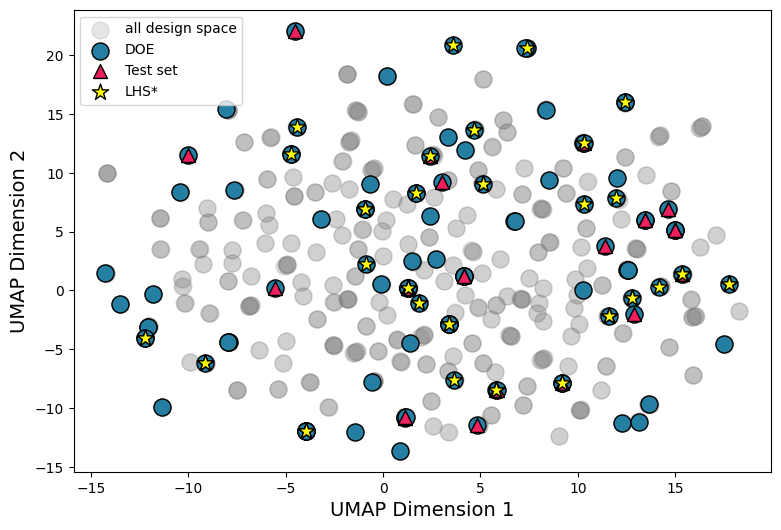

In [ ]:
import umap
import matplotlib.pyplot as plt

# Create a UMAP reducer
reducer = umap.UMAP(n_components=2, random_state=11111, n_neighbors=2 )

# Fit and transform the data
embedding = reducer.fit_transform(all_space_dataframe.iloc[:, 3:])
embedding_in_house = reducer.transform(data_inhouse_dataframe.iloc[:, 3:])
embedding_sdl = reducer.transform(sdl_data_dataframe.iloc[:, 3:]) #
embedding_lit = reducer.transform(data_lit_dataframe.iloc[:, 3:]) #data_lit_dataframe
embedding_llh = reducer.transform(reduced_df.iloc[:, 3:]) #data_lit_dataframe
embedding_filtered_sdl = reducer.transform(filtered_sdl_dataframe.iloc[:, 3:]) #
embedding_initial_lhs_sdl = reducer.transform(pd.DataFrame(lhs_array)) #


# Create the plot
plt.figure(figsize=(9, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], s=150,   color='grey', alpha=0.2, label='all design space')
# plt.scatter(embedding_in_house[:, 0], embedding_in_house[:, 1], s=50, color='r', edgecolors='black', marker='^', label="DOE") #, label='in-house data')
# plt.scatter(embedding_sdl[:, 0], embedding_sdl[:, 1], s=50, color='r', edgecolors='black', marker='^', label="DOE" )# label='sdl data')

plt.scatter(np.concatenate([embedding_in_house[:, 0], embedding_sdl[:, 0]]), np.concatenate([embedding_in_house[:, 1], embedding_sdl[:, 1]]), s=150, color='#247fa3', edgecolors='black', marker='o', label="DOE" )# label='sdl data')

# plt.scatter(embedding_lit[:, 0], embedding_lit[:, 1], s=50, color='g',marker='^',  label='literature data')
# plt.scatter(embedding_initial_lhs_sdl[:, 0], embedding_initial_lhs_sdl[:, 1], s=50, color='red',marker='o',  label='LHS')

plt.scatter(embedding_filtered_sdl[:, 0], embedding_filtered_sdl[:, 1], s=100, color='#ed1f5d', edgecolors='black',  marker='^',  label='Test set') # (SDL data)
plt.scatter(embedding_llh[:, 0], embedding_llh[:, 1], s=150, color='yellow',  marker='*',  label='LHS*', edgecolors='black')

# plt.title("UMAP Projection of all_space_dataframe")
plt.xlabel("UMAP Dimension 1", fontsize=14)
plt.ylabel("UMAP Dimension 2", fontsize=14)
plt.legend()
# plt.grid(True)
plt.tight_layout
plt.savefig('all_space_figure.png', dpi=600)
plt.show()


In [ ]:
def weighted_mse_loss(input, target):
    weights = Variable(torch.Tensor([0.5,1,1]))#.cuda()  # Higher weight for the a and b values than for the L
    pct_var = (input-target)**2
    out = pct_var * weights.expand_as(target)
    loss = out.mean()
    return loss

In [ ]:
def weighted_mse_loss(input, target, weights=None):
    if weights is None:
        weights = torch.FloatTensor([0.8, 1, 1]).to(target.device)
    weights = weights / weights.sum()
    pct_var = (input - target) ** 2
    out = pct_var * weights.expand_as(target)
    loss = out.mean()
    return loss


In [ ]:
# Define CoPolymerSetTransformer

class CoPolymerSetTransformer(nn.Module):
    def __init__(self, dropout_ratio, device, epochs, learning_rate, batch_size):
        super().__init__()
        self.dropout_ratio = dropout_ratio
        self.device = device
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.enc = nn.Sequential(
            SAB(dim_in=1056, dim_out=800, num_heads=5),
            nn.Dropout(p=self.dropout_ratio),
            nn.LayerNorm(800),
            SAB(dim_in=800, dim_out=600, num_heads=5),
            nn.LayerNorm(600),
            nn.Dropout(p=self.dropout_ratio),
            SAB(dim_in=600, dim_out=500, num_heads=5),
            nn.Dropout(p=self.dropout_ratio),
            nn.LayerNorm(500)
        )
        self.dec = nn.Sequential(PMA(dim=500, num_heads=2, num_seeds=1),
                                SAB(dim_in=500, dim_out=400, num_heads=2),
                                 nn.LayerNorm(400),
                                 nn.Dropout(p=self.dropout_ratio),
                                 nn.LeakyReLU(),
                                 nn.Linear(in_features=400, out_features=3))

    def forward(self, x):
        x = x.reshape((x.shape[0], 3, -1))
        x = self.enc(x)
        x = self.dec(x)
        return x.squeeze(-1).squeeze(1)

    def predict(self, data):
        torch.manual_seed(0)
        x = torch.FloatTensor(data)
        x = x.float().to(self.device)
        y = self(x)
        return y.detach().squeeze(1).numpy()

    def train_model(self, data1, data2, data3, y_new):
        torch.manual_seed(0)
        enable_dropout(self)
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        criterion = weighted_mse_loss #nn.MSELoss().to(device) #weighted_mse_loss
        losses = []
        for _ in tqdm.tqdm(range(self.epochs)):
            for x, y in DataLoader(MonomerPair(data1, data2, data3, y_new), batch_size=self.batch_size):
                x, y = x.float(), y.float() #.to(self.device)
                loss = criterion(self(x), y)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                losses.append(loss.item())
        return losses, optimizer

    def test_model(self, data1, data2, data3, target):
        y_list=[]
        y_list_std=[]
        torch.manual_seed(0)
        enable_dropout(self)

        for i in range(10):
            self = self.to(self.device)
            for x, y in DataLoader(MonomerPair(data1, data2, data3, target), batch_size=len(data1)):
                x, y = x.float(), y.float() #.to(self.device)
                y= self(x)
                y_list.append(y.detach().numpy())
                y_list_std.append(y[:, :].detach().numpy())

        return np.mean(y_list, axis=0), np.std(np.std(y_list_std, axis=0), axis=1)


In [ ]:
# Case study 2a: Train co-polymer-set-transformer using randomly selected data with Latin hypercube
X_train = test_case2_dataframe.iloc[:, 3:]

df_y_external = reduced_df_properties
scalery = MinMaxScaler().fit(df_y_external)
y_train = scalery.transform(df_y_external)

X_test = filtered_sdl_dataframe.iloc[:, 3:]
y_test = scalery.transform(filtered_sdl_data_properties)

Ndims = int(X_train.shape[1]/3)
device ='cpu'
epochs, learning_rate, batch_size = 450, 1e-3, 12
dropout_ratio = 0.15

model = CoPolymerSetTransformer(dropout_ratio, device, epochs, learning_rate, batch_size)#, use_abs_decoder=False)

# Prepare your data
train_data_1, train_data_2, train_data_3= np.array(X_train.iloc[:, :Ndims].values, dtype=float), np.array(X_train.iloc[:, Ndims:2*Ndims].values, dtype=float), np.array(X_train.iloc[:, 2*Ndims:].values, dtype=float)
y_lab = np.array(data_inhouse[['L' ,'a', 'b']], dtype=np.float16)

losses1, losses2 = model.train_model(train_data_1, train_data_2, train_data_3, y_train)

100%|██████████| 450/450 [01:21<00:00,  5.51it/s]


In [ ]:
# Train co-polymer-set-transformer on the in-house data only
X_train = data_inhouse_dataframe.iloc[:, 3:]

df_y_external = data_inhouse[['L' ,'a', 'b']]
scalery = MinMaxScaler().fit(df_y_external)
y_train = scalery.transform(df_y_external)

X_test = sdl_data_dataframe.iloc[:, 3:]
y_test = scalery.transform(sdl_data[['L' ,'a', 'b']])

Ndims = int(X_train.shape[1]/3)
device ='cpu'
epochs, learning_rate, batch_size = 450, 1e-3, 12
dropout_ratio = 0.15

model = CoPolymerSetTransformer(dropout_ratio, device, epochs, learning_rate, batch_size)#, use_abs_decoder=False)

# Prepare your data
train_data_1, train_data_2, train_data_3= np.array(X_train.iloc[:, :Ndims].values, dtype=float), np.array(X_train.iloc[:, Ndims:2*Ndims].values, dtype=float), np.array(X_train.iloc[:, 2*Ndims:].values, dtype=float)
y_lab = np.array(data_inhouse[['L' ,'a', 'b']], dtype=np.float16)

losses1, losses2 = model.train_model(train_data_1, train_data_2, train_data_3, y_train)

100%|██████████| 450/450 [01:54<00:00,  3.95it/s]


In [ ]:
validation_data_1, validation_data_2, validation_data_3, y_valid = X_test.iloc[:, :Ndims].values, X_test.iloc[:, Ndims:2*Ndims].values,X_test.iloc[:, 2*Ndims:].values, np.array(y_test, dtype=np.float16)

y_pred_train, std_train = model.test_model(validation_data_3 ,validation_data_2, validation_data_1,  y_test)

y_true=scalery.inverse_transform(y_valid)
y_pred = scalery.inverse_transform(y_pred_train)

print(r2_score(y_true, y_pred, multioutput='variance_weighted'))
print(r2_score(y_true[:,0], y_pred[:,0]))
print(r2_score(y_true[:,1], y_pred[:,1]))
print(r2_score(y_true[:,2], y_pred[:,2]))

0.09265345335006714
-0.23853957653045654
0.5784745216369629
-0.5411936044692993


In [ ]:
print(r2_score(y_true, y_pred, multioutput='variance_weighted'))


0.09265345335006714


In [ ]:
print(mean_absolute_error(y_true[:,1], y_pred[:,1], multioutput='uniform_average'))
print(mean_absolute_error(y_true[:,2], y_pred[:,2], multioutput='uniform_average'))

10.129500389099121
15.893576622009277


In [ ]:
results = {
    "DOE_data" : {
        "train_mae": [],
        "test_mae": [],
        "test_mae_L": [],
        "test_mae_a": [],
        "test_mae_b": [],
        "train_r2":[],
        "test_r2":[],
        "test_r2_L":[],
        "test_r2_a":[],
        "test_r2_b":[],
        "train_loss":[],
        "test_loss":[]
    },

    "Literature_DOE_data" : {
        "train_mae": [],
        "test_mae": [],
        "test_mae_L": [],
        "test_mae_a": [],
        "test_mae_b": [],
        "train_r2":[],
        "test_r2":[],
        "test_r2_L":[],
        "test_r2_a":[],
        "test_r2_b":[],
        "train_loss":[],
        "test_loss":[]
    }
}

In [ ]:
# Update the results dictionary with the data after training with both the DOE and literature data
results["DOE_data"]["test_r2"].append(r2_score(y_true, y_pred, multioutput='variance_weighted'))
results["DOE_data"]["test_r2_L"].append(r2_score(y_true[:,0], y_pred[:,0]))
results["DOE_data"]["test_r2_a"].append(r2_score(y_true[:,1], y_pred[:,1]))
results["DOE_data"]["test_r2_b"].append(r2_score(y_true[:,2], y_pred[:,2]))

results["DOE_data"]["test_mae"].append(mean_absolute_error(y_true,y_pred))
results["DOE_data"]["test_mae_L"].append(mean_absolute_error(y_true[:,0], y_pred[:,0]))
results["DOE_data"]["test_mae_a"].append(mean_absolute_error(y_true[:,1], y_pred[:,1]))
results["DOE_data"]["test_mae_b"].append(mean_absolute_error(y_true[:,2], y_pred[:,2]))

In [ ]:
results

{'DOE_data': {'train_mae': [],
  'test_mae': [23.270723342895508],
  'test_mae_L': [17.001733779907227],
  'test_mae_a': [15.785240173339844],
  'test_mae_b': [37.02519607543945],
  'train_r2': [],
  'test_r2': [-1.850935935974121],
  'test_r2_L': [-4.525923728942871],
  'test_r2_a': [-0.02700626850128174],
  'test_r2_b': [-3.9366941452026367],
  'train_loss': [],
  'test_loss': []},
 'Literature_DOE_data': {'train_mae': [],
  'test_mae': [],
  'test_mae_L': [],
  'test_mae_a': [],
  'test_mae_b': [],
  'train_r2': [],
  'test_r2': [],
  'test_r2_L': [],
  'test_r2_a': [],
  'test_r2_b': [],
  'train_loss': [],
  'test_loss': []}}

In [ ]:
def setup_subplot(ax, y_true, y_pred, color, marker, xlabel, ylabel):
    from matplotlib import rcParams
    import matplotlib.pyplot as plt
    from matplotlib import rc
    plt.rcParams["font.weight"] = "normal"
    plt.rcParams["axes.labelweight"] = "normal"
    slope, intercept, r_value, p_value, std_err = stats.linregress(y_true, y_pred)
    r2 =r2_score(y_true, y_pred)
    ax.scatter(y_true,y_pred, color=color, s=150, edgecolor='black', marker='o', label='$R^2$ = {:.2f} \n $r$ = {:.2f}'.format(r2, r_value))

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, label='y=x')
    # ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.spines['bottom'].set_color('black')
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.tick_params(axis='both', which='both', width=2)
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='both', which='major', length=14)
    ax.tick_params(axis='both', which='minor', length=8, color='black')
    ax.tick_params(axis='both', which='both', bottom=True, top=True, left=True, right=True, direction='in')
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.legend(prop={'size': 16})

In [ ]:
y_pred[:,2]
#y_pred[:,0]

array([20.693275, 22.267763, 19.387157, 20.969862, 21.765358, 19.995474,
       44.623703, 21.272478, 46.176147, 24.631496, 22.256851, 33.92241 ,
       32.389713, 33.8642  , 31.752333, 26.581005, 28.556465, 26.998056,
       24.096815, 25.964104, 26.850313, 28.276299, 26.02598 , 28.484306,
       27.865631, 26.72766 , 27.31508 ], dtype=float32)

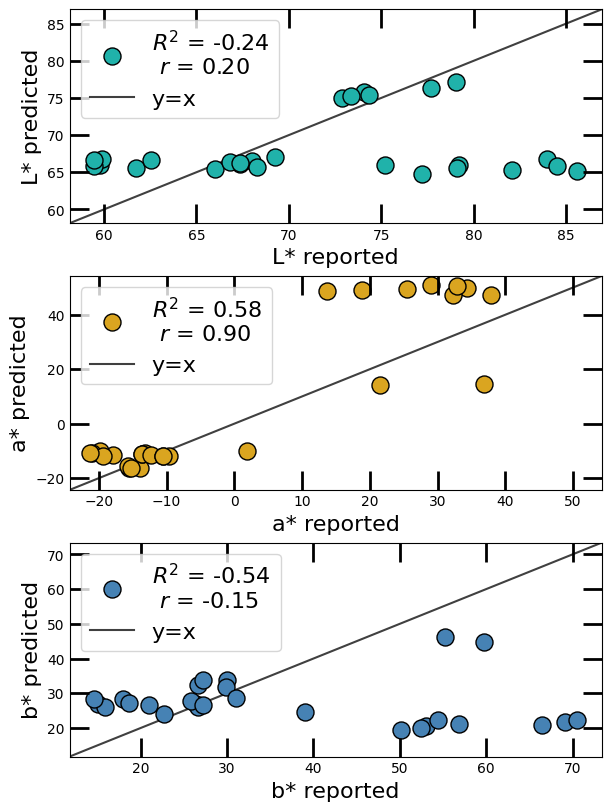

In [ ]:
# Plot L*, a*, b* values
fig, axes = plt.subplots(figsize=(6,8), nrows=3, ncols=1, constrained_layout=True)

setup_subplot(axes[0], y_true[:,0], y_pred[:,0], "lightseagreen", '^', 'L* reported', 'L* predicted')
setup_subplot(axes[1], y_true[:,1], y_pred[:,1], "goldenrod", '^', 'a* reported', 'a* predicted')
setup_subplot(axes[2], y_true[:,2], y_pred[:,2], "steelblue", '^', 'b* reported', 'b* predicted')

plt.show()

In [ ]:
# Manual calculation of trainable parameters based on the architecture

# SAB Layers
sab1_params = (1056 * 800) + 800  # Weights + Biases for SAB(dim_in=1056, dim_out=800)
sab2_params = (800 * 600) + 600   # Weights + Biases for SAB(dim_in=800, dim_out=600)
sab3_params = (600 * 500) + 500   # Weights + Biases for SAB(dim_in=600, dim_out=500)

# PMA Layer
pma_params = (500 * 500) + 500    # Weights + Biases for PMA(dim=500, num_heads=2, num_seeds=1)

# Decoder SAB Layer
decoder_sab_params = (500 * 400) + 400  # Weights + Biases for SAB(dim_in=500, dim_out=400)

# Final Linear Layer
linear_params = (400 * 3) + 3     # Weights + Biases for Linear(in_features=400, out_features=3)

# Total trainable parameters
total_params = sab1_params + sab2_params + sab3_params + pma_params + decoder_sab_params + linear_params
total_params


2078803

In [ ]:
X_test = sdl_data_dataframe.iloc[indices_to_keep].iloc[:, 3:]
y_test = scalery.transform(filtered_sdl_data_properties)


In [ ]:
# Train co-polymer-set-transformer on literature data only
X_train = data_lit_dataframe.iloc[:, 3:] #pd.concat([data_lit_dataframe.iloc[:, 3:], data_inhouse_dataframe.iloc[:, 3:]], axis = 0)

df_y_external = data_lit[['L' ,'a', 'b']] # np.concatenate([data_lit[['L' ,'a', 'b']], data_inhouse[['L' ,'a', 'b']]])
scalery = MinMaxScaler().fit(df_y_external)
y_train = scalery.transform(df_y_external)

X_test = sdl_data_dataframe.iloc[:, 3:]
y_test = scalery.transform(sdl_data[['L' ,'a', 'b']])

Ndims = int(X_train.shape[1]/3)
device ='cpu'
epochs, learning_rate, batch_size = 450, 1e-3, 12 #150, 1e-3, 12
dropout_ratio = 0.15

model = CoPolymerSetTransformer(dropout_ratio, device, epochs, learning_rate, batch_size)#, use_abs_decoder=False)

# Prepare your data
train_data_1, train_data_2, train_data_3= np.array(X_train.iloc[:, :Ndims].values, dtype=float), np.array(X_train.iloc[:, Ndims:2*Ndims].values, dtype=float), np.array(X_train.iloc[:, 2*Ndims:].values, dtype=float)
y_lab = np.array(data_inhouse[['L' ,'a', 'b']], dtype=np.float16)

losses1, losses2 = model.train_model(train_data_1, train_data_2, train_data_3, y_train)

# losses1, losses2

100%|██████████| 450/450 [01:51<00:00,  4.04it/s]


In [ ]:
validation_data_1, validation_data_2, validation_data_3, y_valid = X_test.iloc[:, :Ndims].values, X_test.iloc[:, Ndims:2*Ndims].values,X_test.iloc[:, 2*Ndims:].values, np.array(y_test, dtype=np.float16)

valid_data = np.concatenate(( validation_data_3 ,validation_data_2, validation_data_1), axis=1)
y_pred_train, std_train = model.test_model (validation_data_3 ,validation_data_2, validation_data_1,  y_test)

y_true = scalery.inverse_transform(y_valid) # y_valid #y_valid #
y_pred = scalery.inverse_transform(y_pred_train) # y_pred_train #.detach().numpy()) y_pred_train  #

print(r2_score(y_true, y_pred, multioutput='variance_weighted'))
print(r2_score(y_true[:,0], y_pred[:,0]))
print(r2_score(y_true[:,1], y_pred[:,1]))
print(r2_score(y_true[:,2], y_pred[:,2]))

-0.16507644951343536
-0.18776607513427734
0.37179654836654663
-0.9128744602203369


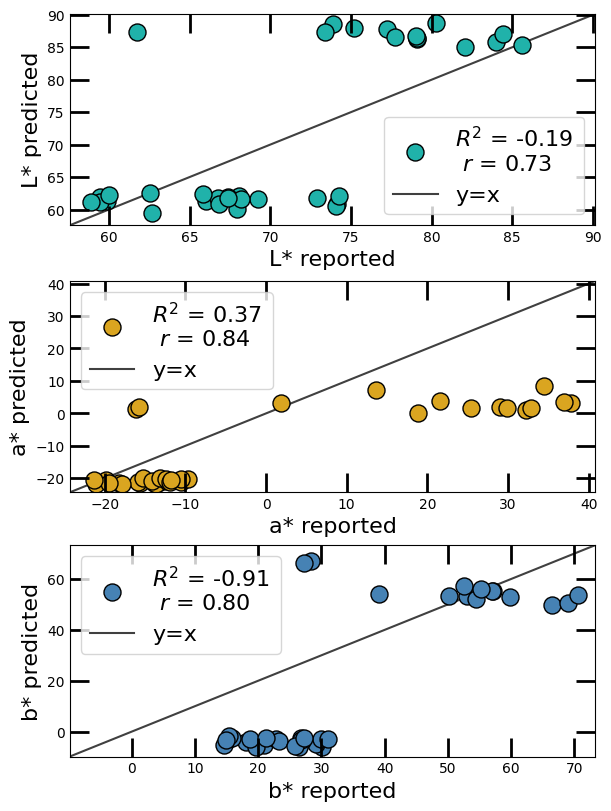

In [ ]:
fig, axes = plt.subplots(figsize=(6,8), nrows=3, ncols=1, constrained_layout=True)

setup_subplot(axes[0], y_true[:,0], y_pred[:,0], "lightseagreen", '^', 'L* reported', 'L* predicted')
setup_subplot(axes[1], y_true[:,1], y_pred[:,1], "goldenrod", '^', 'a* reported', 'a* predicted')
setup_subplot(axes[2], y_true[:,2], y_pred[:,2], "steelblue", '^', 'b* reported', 'b* predicted')

plt.show()

In [ ]:
# Train co-polymer-set-transformer on the literature + LSH data
X_train = pd.concat([data_lit_dataframe.iloc[:, 3:],  test_case2_dataframe.iloc[:, 3:]], axis = 0)

df_y_external = np.concatenate([data_lit[['L' ,'a', 'b']],reduced_df_properties])
scalery = MinMaxScaler().fit(df_y_external)
y_train = scalery.transform(df_y_external)

X_test = filtered_sdl_dataframe.iloc[:, 3:]
y_test = scalery.transform(filtered_sdl_data_properties)

Ndims = int(X_train.shape[1]/3)
device ='cpu'
epochs, learning_rate, batch_size = 450, 1e-3, 12 #150, 1e-3, 12
dropout_ratio = 0.15

model = CoPolymerSetTransformer(dropout_ratio, device, epochs, learning_rate, batch_size)#, use_abs_decoder=False)

# Prepare your data
train_data_1, train_data_2, train_data_3= np.array(X_train.iloc[:, :Ndims].values, dtype=float), np.array(X_train.iloc[:, Ndims:2*Ndims].values, dtype=float), np.array(X_train.iloc[:, 2*Ndims:].values, dtype=float)
y_lab = np.array(data_inhouse[['L' ,'a', 'b']], dtype=np.float16)

losses1, losses2 = model.train_model(train_data_1, train_data_2, train_data_3, y_train)

# losses1, losses2

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
100%|██████████| 450/450 [03:18<00:00,  2.27it/s]


In [ ]:
validation_data_1, validation_data_2, validation_data_3, y_valid = X_test.iloc[:, :Ndims].values, X_test.iloc[:, Ndims:2*Ndims].values,X_test.iloc[:, 2*Ndims:].values, np.array(y_test, dtype=np.float16)

valid_data = np.concatenate(( validation_data_3 ,validation_data_2, validation_data_1), axis=1)
y_pred_train, std_train = model.test_model (validation_data_3 ,validation_data_2, validation_data_1,  y_test)

y_true = scalery.inverse_transform(y_valid) # y_valid #y_valid #
y_pred = scalery.inverse_transform(y_pred_train) # y_pred_train #.detach().numpy()) y_pred_train  #

print(r2_score(y_true, y_pred, multioutput='variance_weighted'))
print(r2_score(y_true[:,0], y_pred[:,0]))
print(r2_score(y_true[:,1], y_pred[:,1]))
print(r2_score(y_true[:,2], y_pred[:,2]))

0.6090776324272156
0.6693350672721863
0.9000707864761353
0.17546826601028442


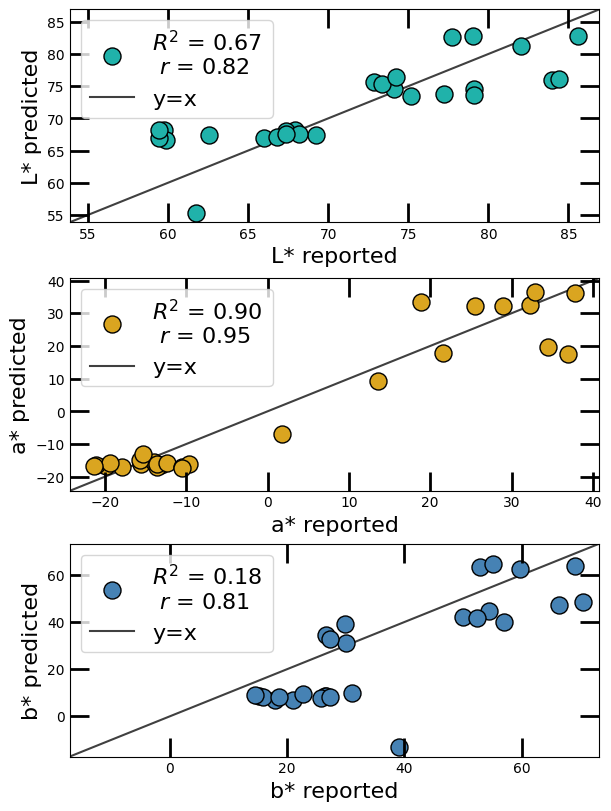

In [ ]:
fig, axes = plt.subplots(figsize=(6,8), nrows=3, ncols=1, constrained_layout=True)

setup_subplot(axes[0], y_true[:,0], y_pred[:,0], "lightseagreen", '^', 'L* reported', 'L* predicted')
setup_subplot(axes[1], y_true[:,1], y_pred[:,1], "goldenrod", '^', 'a* reported', 'a* predicted')
setup_subplot(axes[2], y_true[:,2], y_pred[:,2], "steelblue", '^', 'b* reported', 'b* predicted')

plt.show()

In [ ]:
validation_data_1, validation_data_2, validation_data_3, y_valid = X_test.iloc[:, :Ndims].values, X_test.iloc[:, Ndims:2*Ndims].values,X_test.iloc[:, 2*Ndims:].values, np.array(y_test, dtype=np.float16)

valid_data = np.concatenate(( validation_data_3 ,validation_data_2, validation_data_1), axis=1)
y_pred_train, std_train = model.test_model (validation_data_3 ,validation_data_2, validation_data_1,  y_test)

y_true = scalery.inverse_transform(y_valid) # y_valid #y_valid #
y_pred = scalery.inverse_transform(y_pred_train) # y_pred_train #.detach().numpy()) y_pred_train  #

print(r2_score(y_true, y_pred, multioutput='variance_weighted'))
print(r2_score(y_true[:,0], y_pred[:,0]))
print(r2_score(y_true[:,1], y_pred[:,1]))
print(r2_score(y_true[:,2], y_pred[:,2]))

0.6172688007354736
0.2576083540916443
0.7080533504486084
0.5598974227905273


In [ ]:
print(mean_absolute_error(y_true[:,1], y_pred[:,1], multioutput='uniform_average'))
print(mean_absolute_error(y_true[:,2], y_pred[:,2], multioutput='uniform_average'))

12.526944160461426
20.834487915039062


In [ ]:
print(mean_absolute_error(y_true[:,0], y_pred[:,0], multioutput='uniform_average'))
print(mean_absolute_error(y_true[:,1], y_pred[:,1], multioutput='uniform_average'))
print(mean_absolute_error(y_true[:,2], y_pred[:,2], multioutput='uniform_average'))

6.165317058563232
8.094890594482422
10.532451629638672


In [ ]:
# Update the results dictionary with the data after training with both the DOE and literature data
results["Literature_DOE_data"]["test_r2"].append(r2_score(y_true, y_pred, multioutput='variance_weighted'))
results["Literature_DOE_data"]["test_r2_L"].append(r2_score(y_true[:,0], y_pred[:,0]))
results["Literature_DOE_data"]["test_r2_a"].append(r2_score(y_true[:,1], y_pred[:,1]))
results["Literature_DOE_data"]["test_r2_b"].append(r2_score(y_true[:,2], y_pred[:,2]))

results["Literature_DOE_data"]["test_mae"].append(mean_absolute_error(y_true,y_pred))
results["Literature_DOE_data"]["test_mae_L"].append(mean_absolute_error(y_true[:,0], y_pred[:,0]))
results["Literature_DOE_data"]["test_mae_a"].append(mean_absolute_error(y_true[:,1], y_pred[:,1]))
results["Literature_DOE_data"]["test_mae_b"].append(mean_absolute_error(y_true[:,2], y_pred[:,2]))

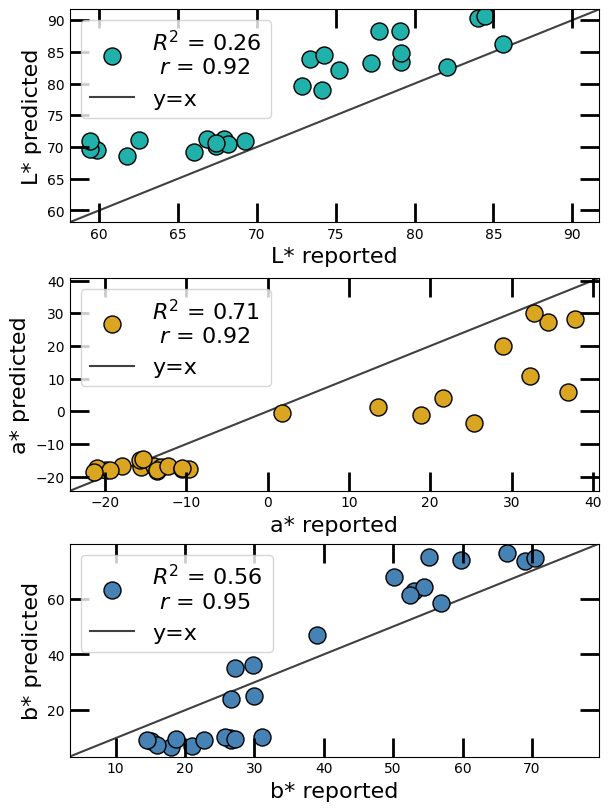

In [ ]:
fig, axes = plt.subplots(figsize=(6,8), nrows=3, ncols=1, constrained_layout=True)

setup_subplot(axes[0], y_true[:,0], y_pred[:,0], "lightseagreen", '^', 'L* reported', 'L* predicted')
setup_subplot(axes[1], y_true[:,1], y_pred[:,1], "goldenrod", '^', 'a* reported', 'a* predicted')
setup_subplot(axes[2], y_true[:,2], y_pred[:,2], "steelblue", '^', 'b* reported', 'b* predicted')

plt.show()

In [ ]:
results#['Literature_DOE_data']#=[]

{'DOE_data': {'train_mae': [],
  'test_mae': [23.270723342895508],
  'test_mae_L': [17.001733779907227],
  'test_mae_a': [15.785240173339844],
  'test_mae_b': [37.02519607543945],
  'train_r2': [],
  'test_r2': [-1.850935935974121],
  'test_r2_L': [-4.525923728942871],
  'test_r2_a': [-0.02700626850128174],
  'test_r2_b': [-3.9366941452026367],
  'train_loss': [],
  'test_loss': []},
 'Literature_DOE_data': {'train_mae': [],
  'test_mae': [8.264220237731934],
  'test_mae_L': [6.165317058563232],
  'test_mae_a': [8.094890594482422],
  'test_mae_b': [10.532451629638672],
  'train_r2': [],
  'test_r2': [0.6172688007354736],
  'test_r2_L': [0.2576083540916443],
  'test_r2_a': [0.7080533504486084],
  'test_r2_b': [0.5598974227905273],
  'train_loss': [],
  'test_loss': []}}

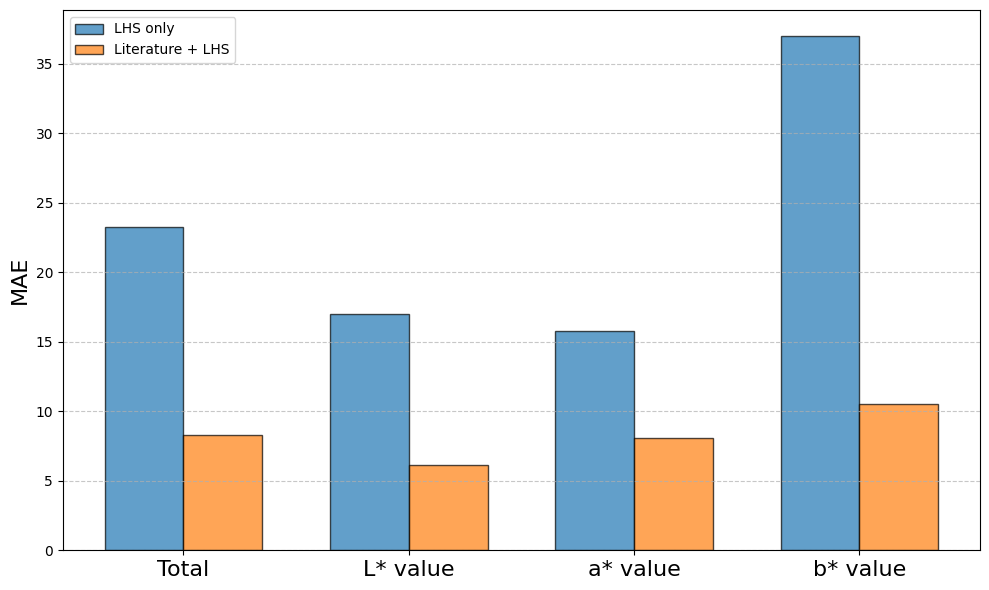

In [ ]:
# Filter only MAE values
categories_mae = ['test_mae', 'test_mae_L', 'test_mae_a', 'test_mae_b']
doe_values = [results['DOE_data'][cat][0] for cat in categories_mae]
literature_values = [results['Literature_DOE_data'][cat][0] for cat in categories_mae]

# Bar chart setup
x = np.arange(len(categories_mae))
width = 0.35

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x - width / 2, doe_values, width, label='LHS only', edgecolor='black', alpha=0.7)
plt.bar(x + width / 2, literature_values, width, label='Literature + LHS', edgecolor='black', alpha=0.7)

# Formatting
plt.ylabel('MAE', fontsize=16)
# plt.title('Comparison of MAE Values')
plt.xticks(x, categories_mae)
plt.xticks(x, ['Total', 'L* value', 'a* value', 'b* value'], fontsize=16)

plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.gca().set_facecolor('white')
# Show plot
plt.show()